# Survival Analysis Lab


In [2]:
import pandas as pd
import plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter

cf.go_offline()

In [3]:
df = pd.read_csv('attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
df['AgeGroup'] = pd.qcut(df['Age'], q=5)

# 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

Tip: If your lines have gaps in them, you can fill them in by using the fillna(method=ffill) and the fillna(method=bfill) methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab

In [6]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

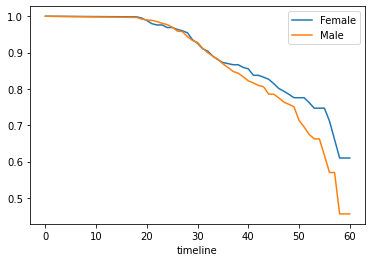

In [15]:
survival(df, 'Gender', 'Age', 'Attrition' ).plot()

# 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

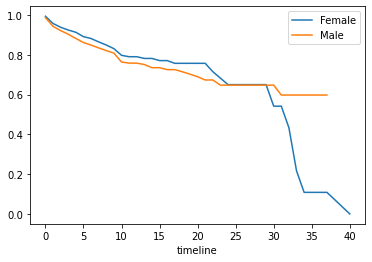

In [19]:
survival(df, 'Gender', 'YearsAtCompany', 'Attrition' ).plot()

# 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this

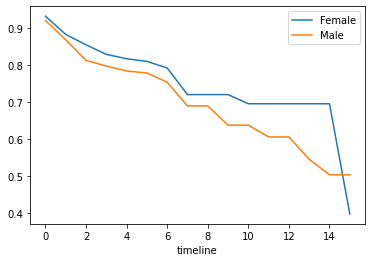

In [18]:
survival(df, 'Gender', 'YearsSinceLastPromotion', 'Attrition' ).plot()

# 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company

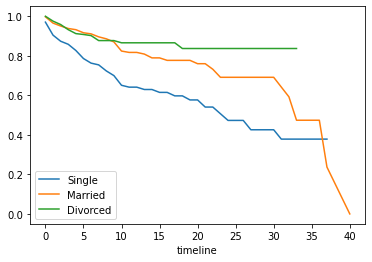

In [21]:
survival(df, 'MaritalStatus', 'YearsAtCompany', 'Attrition' ).plot()

# 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

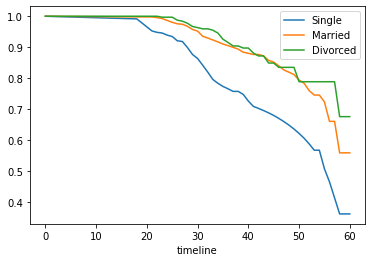

In [23]:
survival(df, 'MaritalStatus', 'Age', 'Attrition' ).plot()

# 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together.

In [27]:
df['Gender_MStatus'] = df['Gender'] + "-" + df['MaritalStatus']

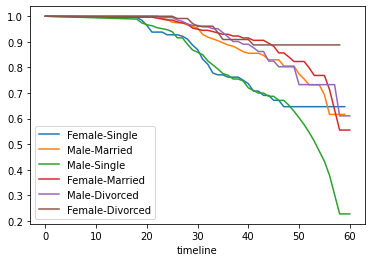

In [29]:
survival(df, 'Gender_MStatus', 'Age', 'Attrition' ).plot()

# 7.Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.


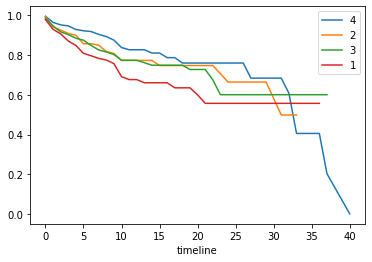

In [30]:
survival(df, 'JobSatisfaction', 'YearsAtCompany', 'Attrition' ).plot()

# 8. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

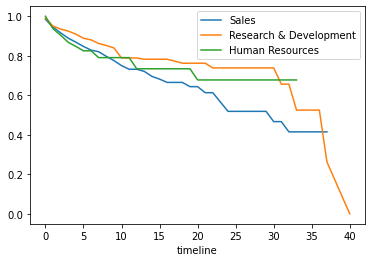

In [31]:
survival(df, 'Department', 'YearsAtCompany', 'Attrition' ).plot()

# 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

In [33]:
df_sales = df[df['Department'] == 'Sales']

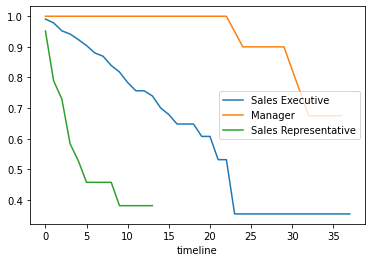

In [34]:
survival(df_sales, 'JobRole', 'YearsAtCompany', 'Attrition' ).plot()

# 9. Let examine how compensation affects attrition

In [36]:
df['PayScale'] = pd.qcut(df['HourlyRate'], q=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

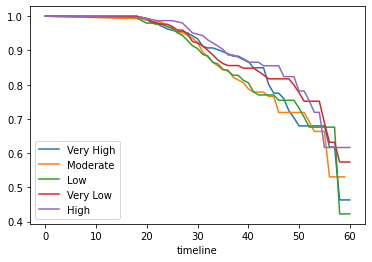

In [37]:
survival(df, 'PayScale', 'Age', 'Attrition' ).plot()

# 10. Finally, let's take a look at how the demands of the job impact employee attrition.
Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
Create a new field that concatenates that field with the BusinessTravel field.
Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [38]:
df['JobConditions'] = np.where(df['Overtime'] == "Yes", "Overtime-" + df['BusinessTravel'], "Regular Hours-" + df['BusinessTravel'])

NameError: name 'np' is not defined